# OC PROJET 4 - CLIENT SEGMENTATION
#### SIMULATION NOTEBOOK
<br></br>
### SOMMAIRE
- <a href="#C1">I. Simulation</a>
    - 1. 
    - 2. 
    - 3.
    
- <a href="#C2">II. Proposition de Maintenance</a>
     - 1. 
     - 2.
     - 3. 
     - 4.

In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

<font size="5">Paramétrages Data Visualisation</font>

In [65]:
# Ajouter une ombre à la police
shadow = path_effects.withSimplePatchShadow(offset=(1,-0.75), shadow_rgbFace='darkblue', alpha=0.25)

# Utiliser la police dans les graphiques, changer la couleur et augmenter la résolution d'affichage
plt.rcParams['font.family'] = 'Ebrima'
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('dark_background')
# set le theme seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.2','text.color': 'white','figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'
# définition des paramètres kwargs typo
text_kwargs = dict(ha='center', va='center', fontsize=10, color='white')

# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

In [66]:
# chargement du df master et conversion des variables temporelles au format datetime

df = pd.read_csv('olist_master.csv')

df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])
df['review_creation_datetime'] = pd.to_datetime(df['review_creation_datetime'])

# TEST DE K MEANS SUR 3 PERIODES DE 6 MOIS

In [4]:
df['order_purchase_datetime'].max()

Timestamp('2018-08-29 15:00:37')

In [5]:
df['order_purchase_datetime'].min()

Timestamp('2016-10-03 09:44:50')

In [17]:
# Convertir la colonne 'order_purchase_datetime' en format de date
df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])

# Filtrer les échantillons pour chaque critère
df_1st_sem_2017 = df[(df['order_purchase_datetime'].dt.year == 2017) & (df['order_purchase_datetime'].dt.month <= 6)]
df_2nd_sem_2017 = df[(df['order_purchase_datetime'].dt.year == 2017) & (df['order_purchase_datetime'].dt.month > 6)]
df_1st_sem_2018 = df[(df['order_purchase_datetime'].dt.year == 2018) & (df['order_purchase_datetime'].dt.month <= 6)]

In [7]:
df_1st_sem_2017.shape

(14868, 30)

In [14]:
df_2nd_sem_2017.shape

(31452, 30)

In [15]:
df_1st_sem_2018.shape

(42492, 30)

# SIMULATION SEMESTRE 1 2017

In [21]:
df_1st_sem_2017.describe()

,customer_zip_code_prefix,review_score,price,freight_value,seller_zip_code_prefix,payment_installments,payment_value,month,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase,cluster
count,14868.000000,14868.000000,14868.000000,14868.000000,14868.000000,14868.000000,14868.000000,14868.000000,14868.0,14868.000000,14868.000000,14868.0,14868.000000,14868.000000,14868.000000,14868.000000
mean,36767.885862,4.187651,127.506848,19.402246,26097.240584,3.071092,155.940888,4.127522,2017.0,12.101359,118.930178,0.0,188.376225,1.010761,498.215631,1.018832
std,29979.331477,1.238180,218.478689,14.587694,28458.026703,2.842303,233.559319,1.514403,0.0,10.620433,42.759652,0.0,331.073391,0.105118,45.864415,0.634999
min,1004.000000,1.000000,2.900000,0.010000,1031.000000,1.000000,0.010000,1.000000,2017.0,0.000000,28.452917,0.0,11.620000,1.000000,427.000000,0.000000
25%,12951.000000,4.000000,39.900000,13.547500,7135.000000,1.000000,54.435000,3.000000,2017.0,7.000000,93.602427,0.0,61.640000,1.000000,459.000000,1.000000
50%,27140.000000,5.000000,75.900000,16.050000,14020.000000,2.000000,98.840000,4.000000,2017.0,10.000000,117.069382,0.0,107.755000,1.000000,491.000000,1.000000
75%,62800.000000,5.000000,134.925000,20.700000,35162.000000,4.000000,171.292500,5.000000,2017.0,15.000000,134.202466,0.0,192.560000,1.000000,535.000000,1.000000
max,99950.000000,5.000000,6499.000000,314.020000,99700.000000,18.000000,6726.660000,6.000000,2017.0,195.000000,1117.622000,0.0,8530.140000,3.000000,603.000000,3.000000


Nombre de clients par cluster:
1    9306
0    2714
2    2702
3     146
Name: cluster, dtype: int64


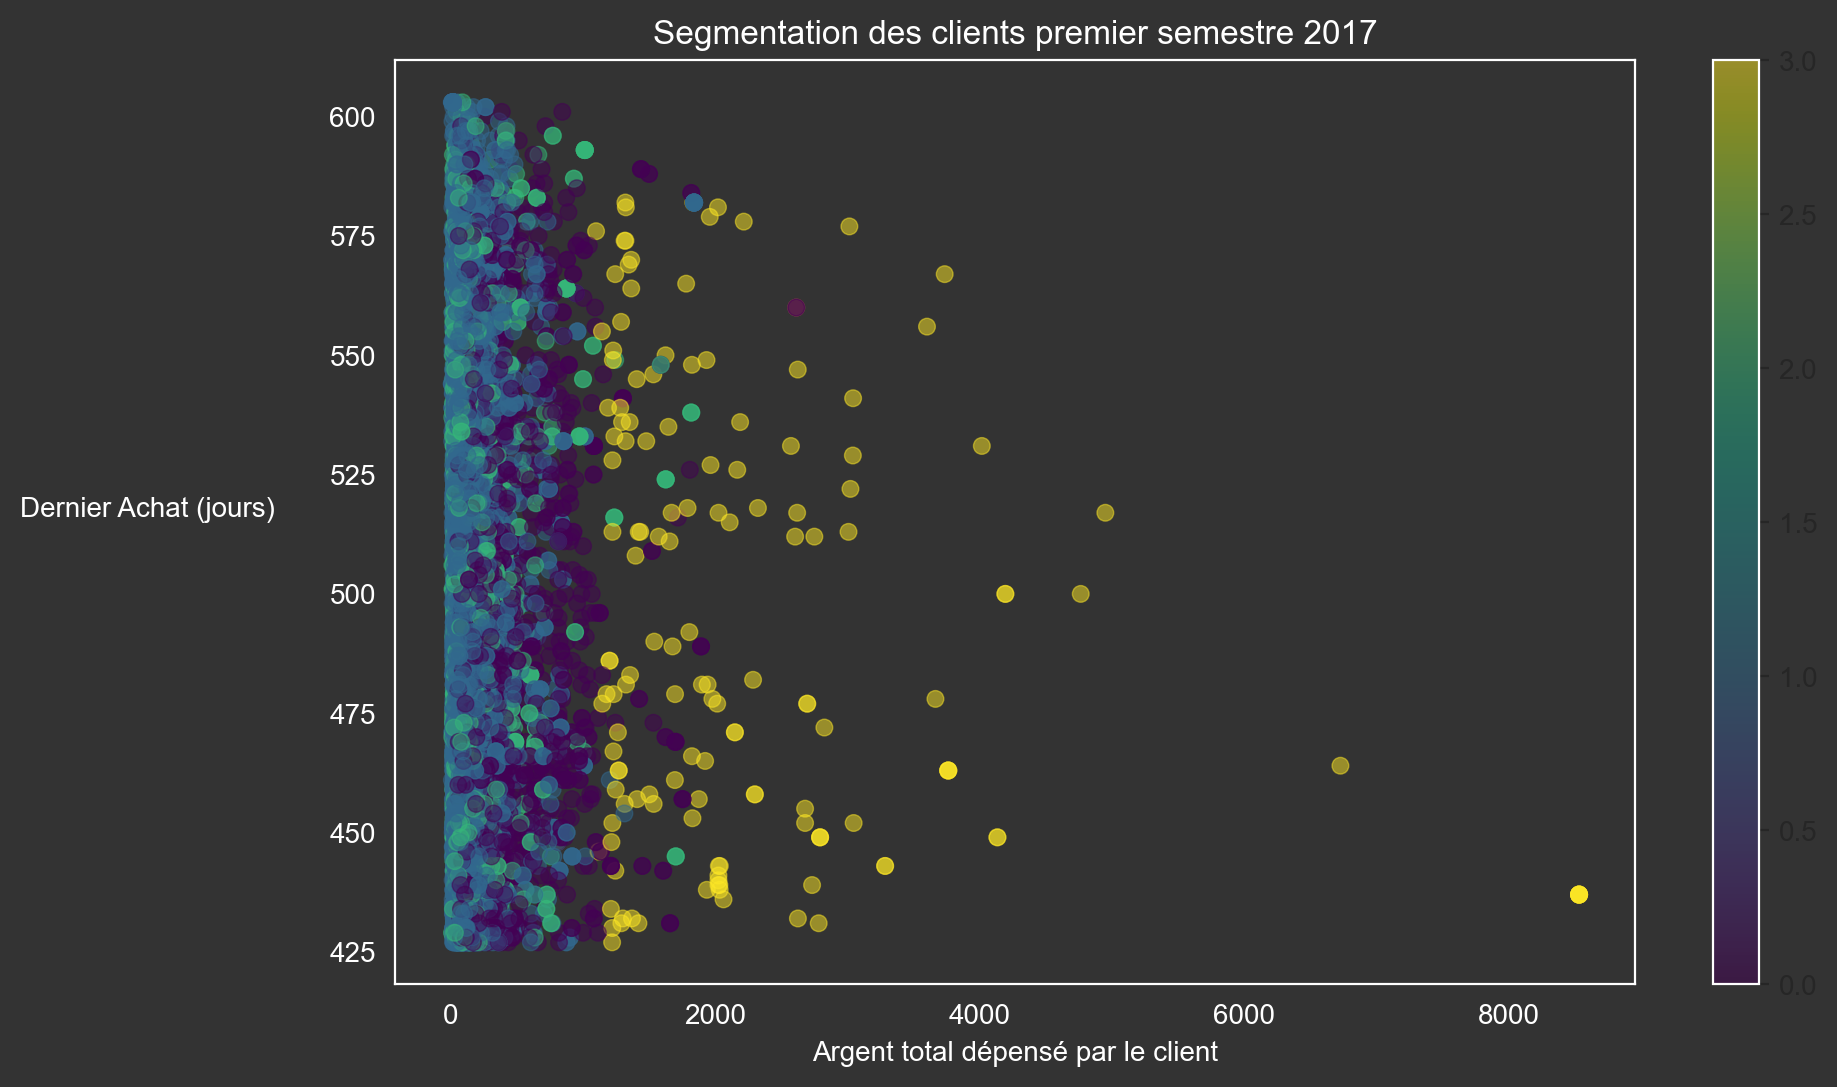

In [48]:
# Chargement des données
data = df_1st_sem_2017

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], 
c=kmeans.labels_, cmap='viridis', alpha=0.5, linewidths=0.5)
plt.xlabel('Argent total dépensé par le client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.2, 0.5)
plt.ylabel('Dernier Achat (jours)', color = 'white', rotation = 360)
plt.title('Segmentation des clients premier semestre 2017')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

In [49]:
data_cluster = data[selected_columns]
data_cluster['cluster'] = kmeans.labels_
# Calculer les moyennes des variables pour chaque cluster
cluster_means = data_cluster.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  payment_installments        price
cluster                                                                                                
0                 314.836680      4.487104                493.364775              7.871776   220.850648
1                 126.538268      4.746078                499.237159              1.810015    87.270712
2                 156.993135      1.976314                499.841969              2.438934    91.104056
3                2359.934247      3.952055                493.178082              5.910959  1630.676301


C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\1288811847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [50]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                              \
                      count         mean          std      min        25%       50%        75%      max   
cluster                                                                                                   
0                    2714.0   314.836680   294.063194    60.00   129.4025   213.530   376.0575  2614.56   
1                    9306.0   126.538268   131.985855    11.62    53.4200    88.365   148.1500  1842.48   
2                    2702.0   156.993135   188.671410    13.17    59.3525   100.380   174.1800  1820.85   
3                     146.0  2359.934247  1590.021978  1101.83  1327.1125  1931.040  2697.3400  8530.14   

        review_score                                               days_since_last_purchase              \
               count      mean       std  min   25%  50%  75%  max                    count        mean   
cluster                             

# SIMULATION SEMESTRE 2 2017

Nombre de clients par cluster:
1    13993
2    11358
0     5031
3     1070
Name: cluster, dtype: int64


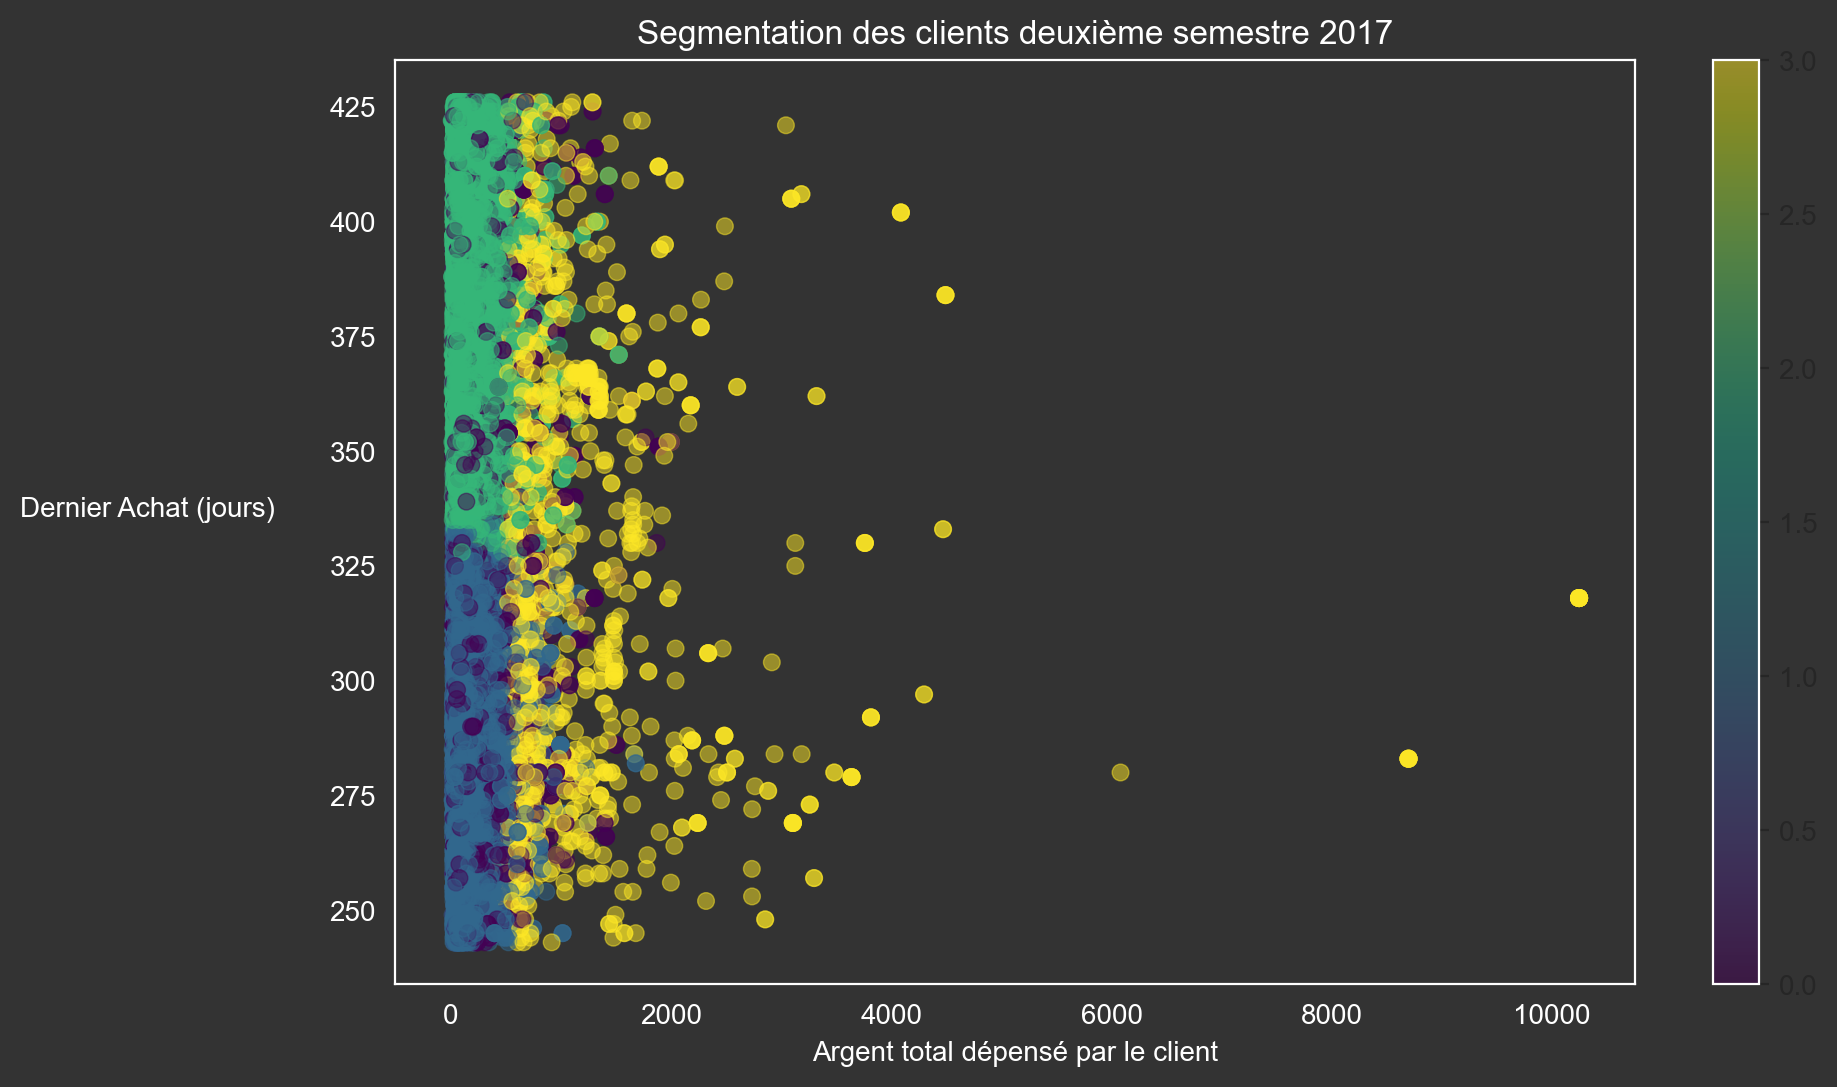

In [69]:
# Chargement des données
data = df_2nd_sem_2017

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_
, cmap='viridis', alpha=0.5, linewidths=0.5)
plt.xlabel('Argent total dépensé par le client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.2, 0.5)
plt.ylabel('Dernier Achat (jours)', color = 'white', rotation = 360)
plt.title('Segmentation des clients deuxième semestre 2017')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

In [52]:
data_cluster = data[selected_columns]
data_cluster['cluster'] = kmeans.labels_
# Calculer les moyennes des variables pour chaque cluster
cluster_means = data_cluster.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  payment_installments       price
cluster                                                                                               
0                 211.221320      1.575432                315.083085              3.393759  101.285291
1                 138.003234      4.630530                284.911527              2.655971   96.065213
2                 143.280423      4.631361                379.328491              3.026853   98.424304
3                1312.798299      4.077570                324.700000              6.877570  774.753346


C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\1288811847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [53]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                          \
                      count         mean          std     min       25%      50%      75%       max   
cluster                                                                                               
0                    5031.0   211.221320   223.712010   14.67   73.2500  135.510   258.04   1996.98   
1                   13993.0   138.003234   127.764514   11.63   60.1300   99.940   168.20   1677.94   
2                   11358.0   143.280423   133.734203    6.15   62.2725  103.460   175.77   1523.28   
3                    1070.0  1312.798299  1357.614719  252.09  669.5600  887.475  1403.77  10247.40   

        review_score                                              days_since_last_purchase              \
               count      mean       std  min  25%  50%  75%  max                    count        mean   
cluster                                                           

# SIMULATION SEMESTRE 1 2018

Nombre de clients par cluster:
1    17604
2    16211
0     7201
3     1476
Name: cluster, dtype: int64


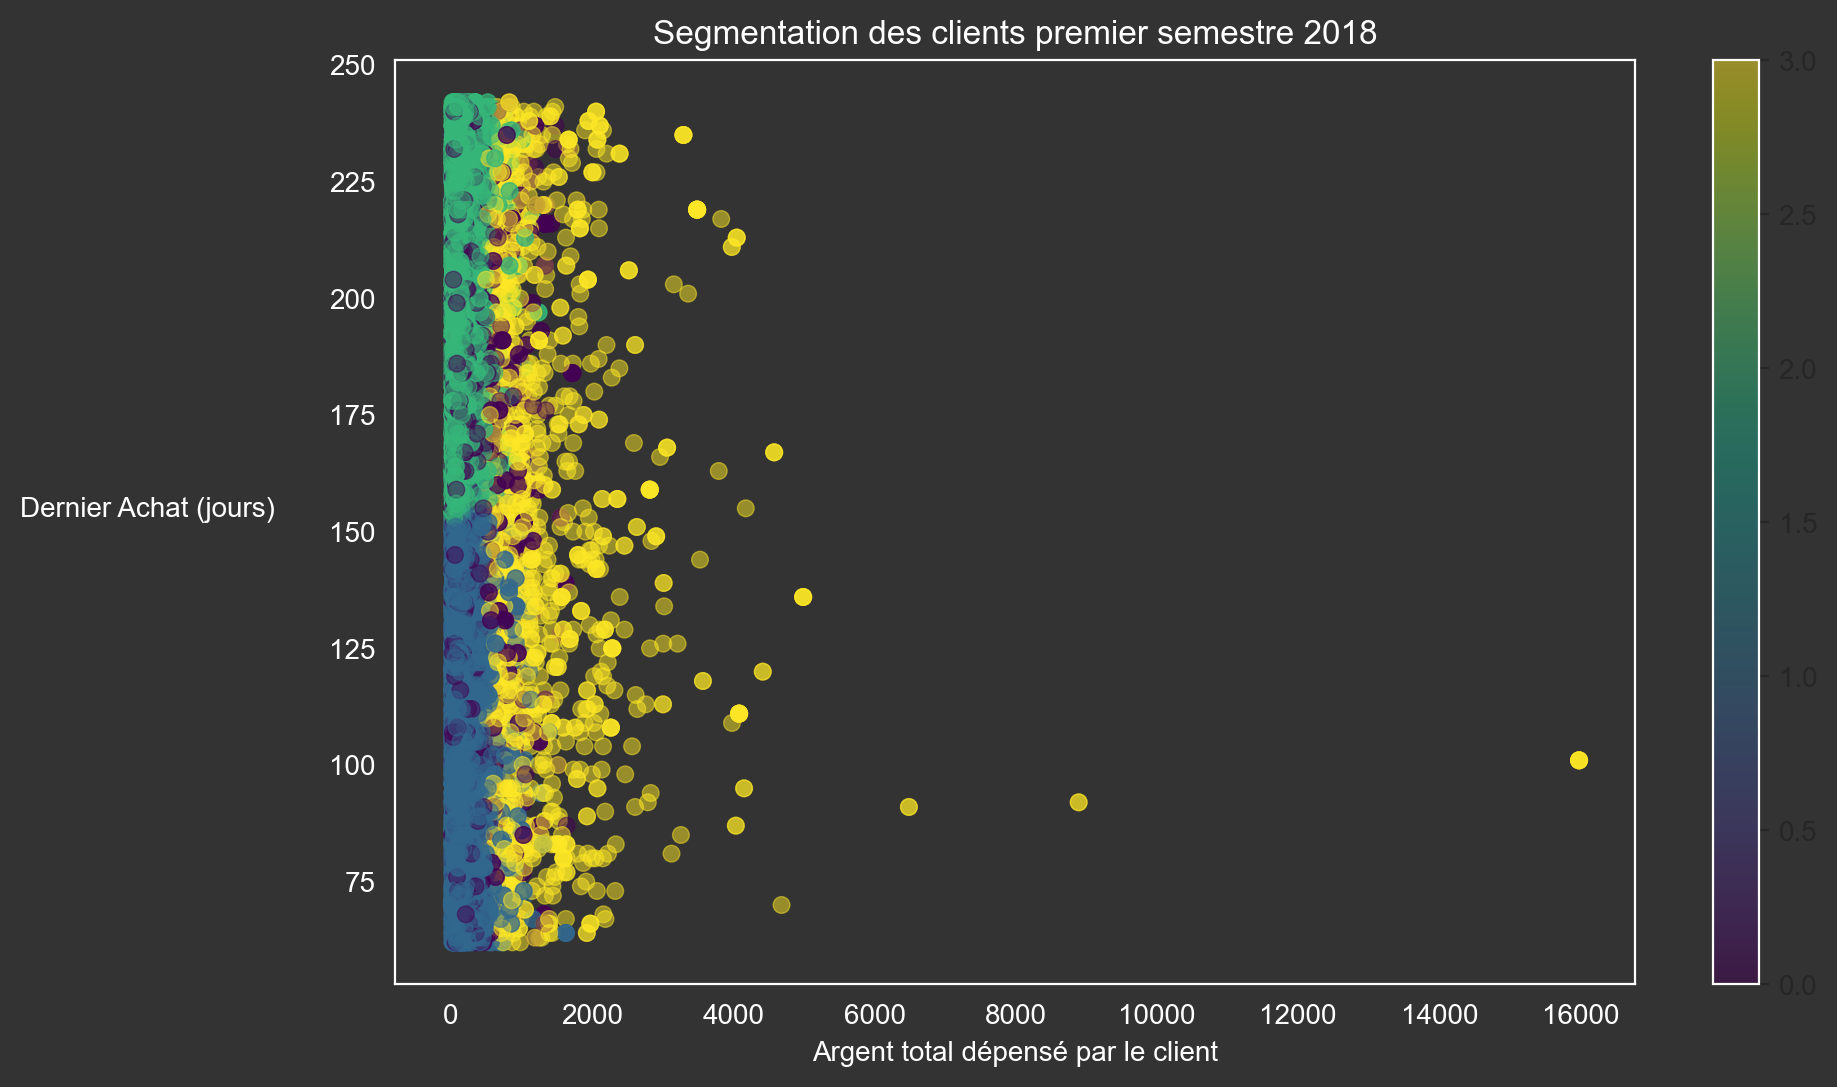

In [54]:
# Chargement des données
data = df_1st_sem_2018

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_
, cmap='viridis', alpha=0.5, linewidths=0.5)
plt.xlabel('Argent total dépensé par le client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.2, 0.5)
plt.ylabel('Dernier Achat (jours)', color = 'white', rotation = 360)
plt.title('Segmentation des clients premier semestre 2018')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

In [55]:
data_cluster = data[selected_columns]
data_cluster['cluster'] = kmeans.labels_
# Calculer les moyennes des variables pour chaque cluster
cluster_means = data_cluster.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  payment_installments       price
cluster                                                                                               
0                 208.990524      1.453965                162.500764              3.087210  103.698122
1                 145.017108      4.644285                108.323960              2.644683  100.408959
2                 133.467652      4.584110                199.962680              2.420949   95.797322
3                1234.266430      3.947832                150.155827              6.831301  805.943977


C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\1288811847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [57]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                         \
                      count         mean          std     min     25%      50%       75%       max   
cluster                                                                                              
0                    7201.0   208.990524   219.915205   11.54   75.07  137.550   251.650   1716.72   
1                   17604.0   145.017108   133.235144   10.89   62.21  107.570   175.990   1627.12   
2                   16211.0   133.467652   117.846968   13.36   57.43   98.610   167.715   1239.36   
3                    1476.0  1234.266430  1191.032167  236.48  678.76  891.525  1409.510  15978.65   

        review_score                                              days_since_last_purchase              \
               count      mean       std  min  25%  50%  75%  max                    count        mean   
cluster                                                                  

# TEST DE K MEANS SUR 2 PERIODES DE 1 AN

In [34]:
# Convertir la colonne 'order_purchase_datetime' en format de date
df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])

# Filtrer les échantillons pour chaque critère
df_2017 = df[(df['order_purchase_datetime'].dt.year == 2017)]
df_2018 = df[(df['order_purchase_datetime'].dt.year == 2018)]

In [11]:
df_2017.shape

(46320, 31)

In [12]:
df_2018.shape

(55712, 30)

# SIMULATION POUR 2017

C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\3337186201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


Nombre de clients par cluster:
1    29100
3     8734
2     7713
0      773
Name: cluster, dtype: int64


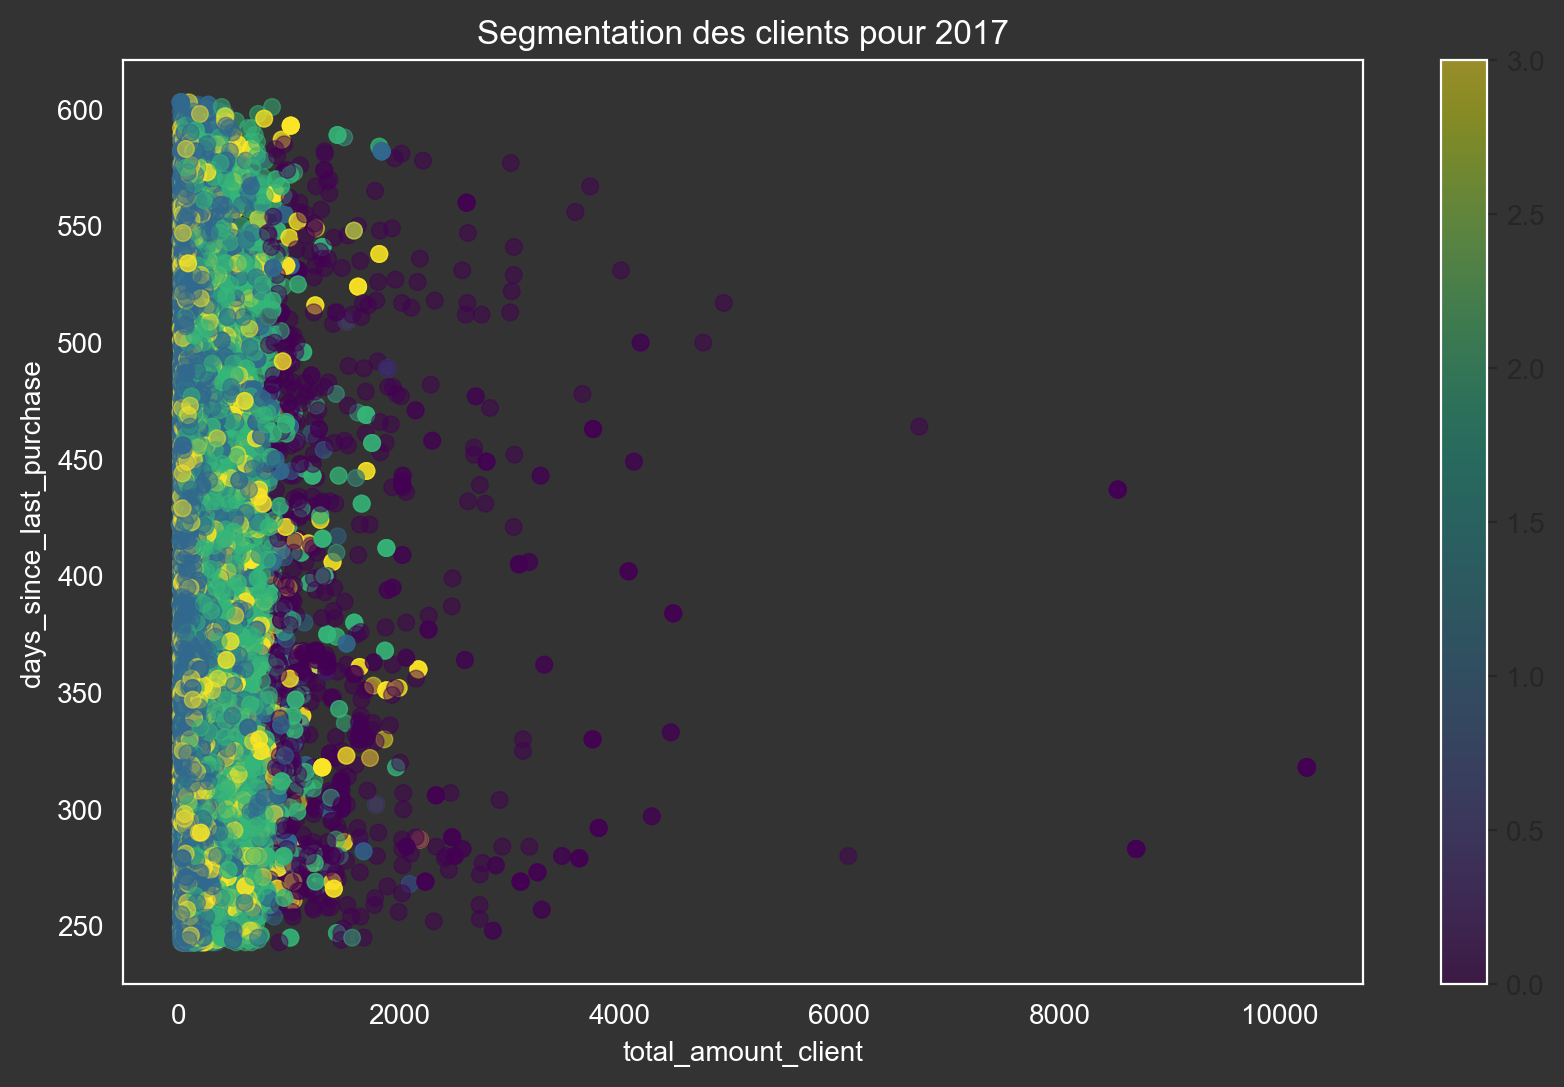

In [58]:
# Chargement des données
data = df_2017

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_,
cmap='viridis', alpha=0.5, linewidths=0.5)
plt.xlabel('total_amount_client', color = 'white')
plt.ylabel('days_since_last_purchase', color = 'white')
plt.title('Segmentation des clients pour 2017')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

In [59]:
data_cluster = data[selected_columns]
data_cluster['cluster'] = kmeans.labels_
# Calculer les moyennes des variables pour chaque cluster
cluster_means = data_cluster.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  payment_installments        price
cluster                                                                                                
0                1870.106054      3.961190                383.949547              6.041397  1094.827581
1                 125.147202      4.744570                381.537698              1.837491    87.476730
2                 290.812581      4.424478                386.470504              8.063659   195.115823
3                 171.304288      1.911381                372.667163              2.438974    91.557714


C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\1288811847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [60]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                            \
                      count         mean          std     min      25%       50%        75%       max   
cluster                                                                                                 
0                     773.0  1870.106054  1630.629048  326.53  1031.69  1338.410  2027.6500  10247.40   
1                   29100.0   125.147202   124.021374    6.15    55.00    89.195   149.2525   2097.28   
2                    7713.0   290.812581   244.713938   59.99   128.04   211.910   367.1900   1973.38   
3                    8734.0   171.304288   199.914417   13.17    63.10   108.510   195.4050   2189.16   

        review_score                                              days_since_last_purchase              \
               count      mean       std  min  25%  50%  75%  max                    count        mean   
cluster                                             

# SIMULATION POUR 2018

C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\3342189504.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


Nombre de clients par cluster:
1    22412
3    22381
2     9121
0     1798
Name: cluster, dtype: int64


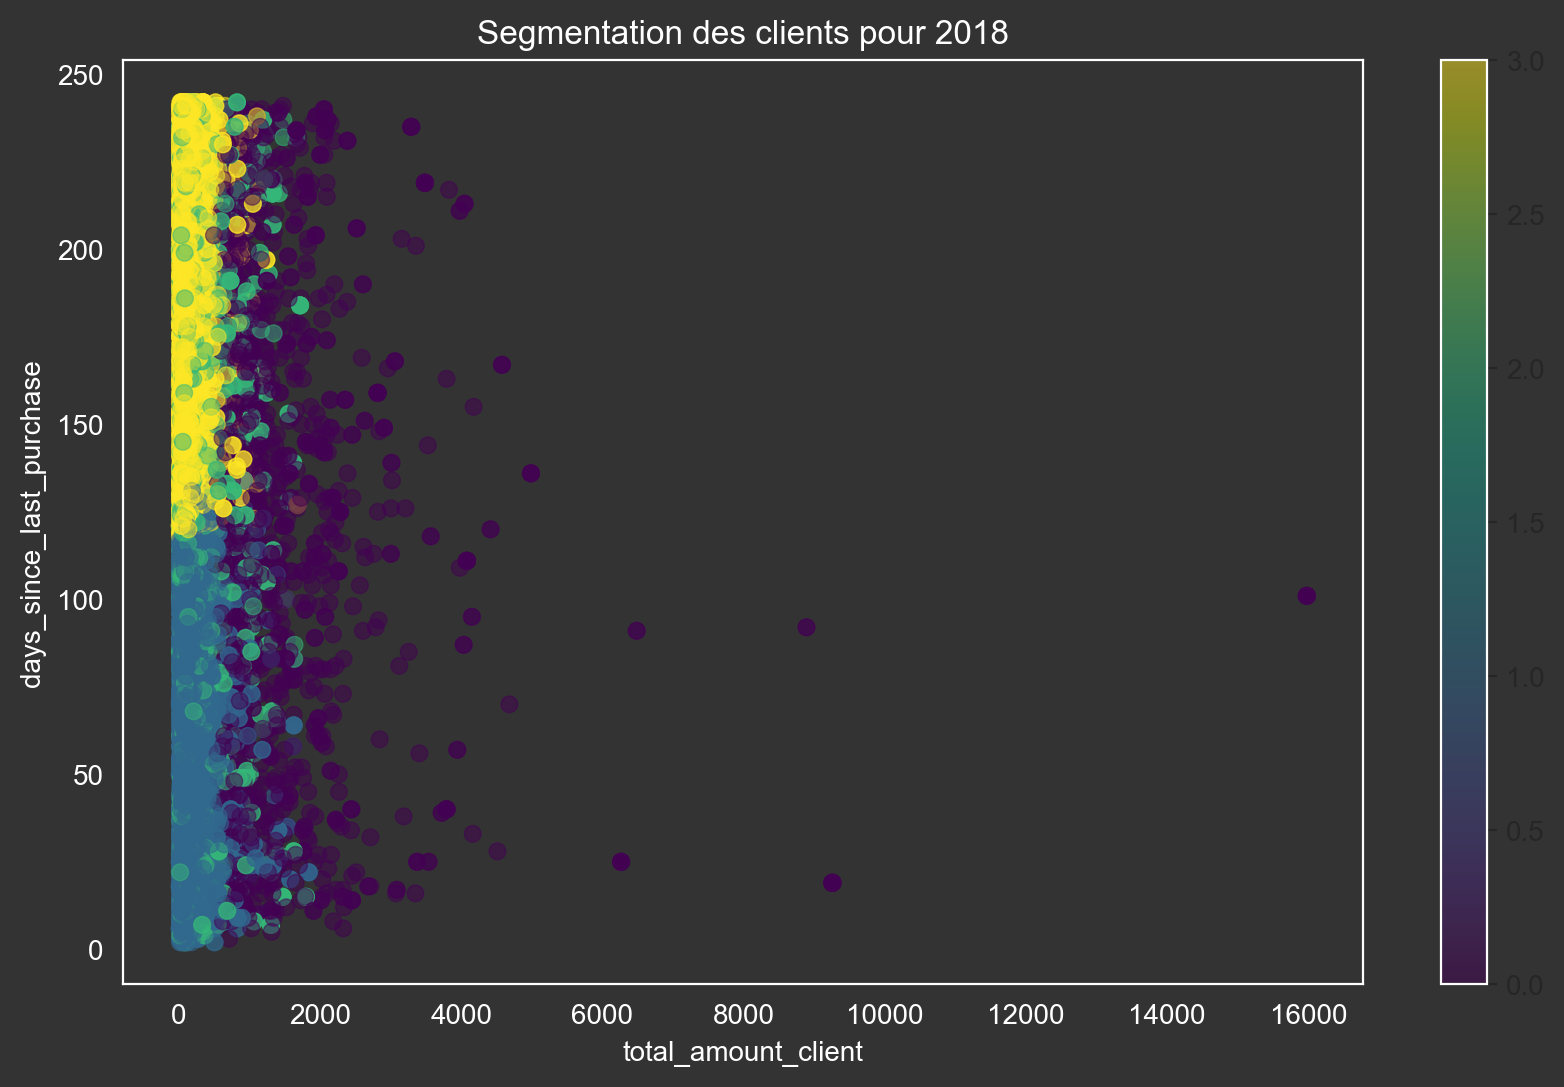

In [61]:
# Chargement des données
data = df_2018

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_
, cmap='viridis', alpha=0.5, linewidths=0.5)
plt.xlabel('total_amount_client', color = 'white')
plt.ylabel('days_since_last_purchase', color = 'white')
plt.title('Segmentation des clients pour 2018')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

In [62]:
data_cluster = data[selected_columns]
data_cluster['cluster'] = kmeans.labels_
# Calculer les moyennes des variables pour chaque cluster
cluster_means = data_cluster.groupby('cluster').mean()

# Afficher les moyennes des variables pour chaque cluster
print(cluster_means)

         total_amount_client  review_score  days_since_last_purchase  payment_installments       price
cluster                                                                                               
0                1319.747208      4.033370                122.722469              6.840378  836.777258
1                 148.343068      4.668838                 61.277575              2.749866  101.350455
2                 213.870054      1.520338                139.435807              3.116873  105.355616
3                 134.159263      4.611188                182.817256              2.352263   96.386002


C:\Users\Oliver\AppData\Local\Temp\ipykernel_8596\1288811847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.labels_


In [63]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        total_amount_client                                                                          \
                      count         mean          std     min     25%      50%        75%       max   
cluster                                                                                               
0                    1798.0  1319.747208  1278.675814  286.78  710.48  920.185  1496.4775  15978.65   
1                   22412.0   148.343068   142.673254    9.59   62.22  108.110   178.9000   1840.20   
2                    9121.0   213.870054   230.646782   11.54   74.87  137.650   255.2400   1799.96   
3                   22381.0   134.159263   119.569983   12.91   57.77   99.080   167.8000   1681.71   

        review_score                                              days_since_last_purchase              \
               count      mean       std  min  25%  50%  75%  max                    count        mean   
cluster                                                           